# Modeling Notebook


## 1. Import libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os 
%config Completer.use_jedi = False

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
os.sys.path.append('../src')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  """


## 2. Load Data

In [4]:
df_raw = pd.read_csv('/content/data_am.txt', sep = "\t")
df_raw.head()

,Genero,Idade,Escolaridade,Estado_Civil,Filhos,Atividade_fisica_semana,Cigarros_dia,Horas_Dormidas_dia,Se_Capacitando,Outro_emprego,Ambiente_Trabalho,Categoria_Profissional,Tempo_Empresa_anos,Tempo_Funcao_anos,Horas_Trabalhadas_Semana,Pausas_Programadas_minutos,Trabalho_Entre_Ferias_meses,Recebeu_Treinamento,Como_foi_treinado,Trabalho_Chato,Trabalho_Organizado,Prazos_Apertados,Satisfacao_Gerencia,Satisfacao_Dificuldades,Tempo_Pe_horas,Tempo_Sentado_horas,Tempo_Corcoras_horas,Superiores_Desconfortavel_horas,Inferiores_Desconfortavel_horas,Tronco_Curvado_horas,Tronco_Torcido_horas,Maos_Dedos_horas,Movimentos_repetitivos_horas,Movimentos_Rapidos_horas,Ferramentas_Maos_horas,Ferramentas_Corpo_horas,dados.Costa_superior,dados.Costa_media,dados.Costa_inferior,bmi,carry_weight
0,1,36,3,2,2,0,0,6,2,2,2,1,8.0,3.0,36,30,11,2,1,1,5,5,5,4,11.0,0.5,0.0,0.0,0.0,1.0,0.0,12.0,12.0,12.0,1.0,0,1,1,1,15.418265,3.0
1,1,30,3,2,1,5,0,6,1,2,2,1,4.0,7.0,40,120,11,1,5,1,4,1,4,3,4.0,4.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0,1,2,1,16.765737,0.0
2,1,40,3,2,3,0,0,10,1,2,1,1,8.0,12.0,36,60,11,1,4,1,5,1,4,3,6.0,6.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,3.0,0.0,0,2,1,1,19.297399,0.0
3,1,45,3,2,1,3,0,8,1,2,1,1,8.0,18.0,36,60,11,1,5,2,5,4,4,3,6.0,6.0,0.0,4.0,8.0,2.0,0.0,12.0,12.0,3.0,0.0,0,1,1,1,17.578125,0.0
4,1,41,5,1,2,5,0,7,2,2,1,1,4.0,4.0,36,0,11,1,3,1,5,3,4,4,11.0,1.0,1.0,10.0,10.0,0.0,0.0,12.0,12.0,10.0,0.0,0,1,1,1,15.943878,3.0


## 3. Feature Engineering

In [5]:
df_analysis = df_raw.copy()
#df_analysis['bmi'] = df_analysis['Peso']/df_analysis['Altura']**2

In [ ]:
#def bmi_category(bmi_value):
#    if bmi_value < 18:
#        return 'underweight'
#    elif bmi_value >= 18 and bmi_value <= 24:
#        return 'normal'
#    elif bmi_value > 24 and bmi_value <= 28:
#        return 'overweight'
#    elif bmi_value > 28:
#        return 'obese'
#    else:
#        return 'error'

In [ ]:
#df_analysis.insert(loc = 1, column = 'IMC_categoria', value = df_analysis['IMC'].apply(bmi_category))

In [ ]:
#df_analysis.insert(loc = 1, 
#                   column = 'Horas_Carregando_Carga', 
#                   value = df_analysis['Carga_6_horas'] + df_analysis['Carga_15_horas'] + df_analysis['Carga_25_horas'])

## 4. Target definition

In [ ]:
#def target_grouping(score):
#    if score >= 4:
#        return 'severe pain'
#    elif score in [2,3]:
#        return 'mild pain'
#   else:
#        return 'no pain'

In [ ]:
#df_analysis['Costa_superior_agg'] = df_analysis['Costa_superior'].apply(target_grouping)
#df_analysis['Costa_media_agg'] = df_analysis['Costa_media'].apply(target_grouping)
#df_analysis['Costa_inferior_agg'] = df_analysis['Costa_inferior'].apply(target_grouping)

## 5. Feature Selection

In [6]:
continous_columns = [
                    'Idade', 
                     'bmi',
                     'Filhos',
                     'Atividade_fisica_semana',
                     'Cigarros_dia',
                     'Horas_Dormidas_dia',
                     'Tempo_Empresa_anos',
                    #'Horas_Trabalhadas_Dia',
                    'Tempo_Funcao_anos',
                     'Horas_Trabalhadas_Semana',
                     'Pausas_Programadas_minutos',
                    'Trabalho_Entre_Ferias_meses',
                    'Tempo_Pe_horas',
                    'Tempo_Sentado_horas',
                    'Tempo_Corcoras_horas',
                    'Superiores_Desconfortavel_horas',
                    'Inferiores_Desconfortavel_horas',
                    'Tronco_Curvado_horas',
                    'Tronco_Torcido_horas',
                    'Maos_Dedos_horas',
                    'carry_weight',
                    'Movimentos_repetitivos_horas',
                    'Movimentos_Rapidos_horas',
                    'Ferramentas_Maos_horas',
                    'Ferramentas_Corpo_horas'
                    ]
categorical_columns = ['Genero',
                       'Estado_Civil',
                       'Se_Capacitando',
                       'Outro_emprego',
                       'Ambiente_Trabalho',
                       'Categoria_Profissional',
                       'Recebeu_Treinamento',
                       'Como_foi_treinado',
                       'Escolaridade',
                       'Trabalho_Chato',
                       'Trabalho_Organizado',
                       'Prazos_Apertados',
                       'Satisfacao_Gerencia',
                       'Satisfacao_Dificuldades'
                       ]
target_columns = ['dados.Costa_superior', 'dados.Costa_media', 'dados.Costa_inferior']

useful_columns = continous_columns + categorical_columns + target_columns

## 6. Train and test split
We'll split the data into train and test set. The train set will be used to perform 10-fold cross validation. We'll compute metrics for the test set and compare them.

In [ ]:
#numerical_features = [
#    'Idade', 
#    'Filhos',
#    'Horas_Trabalhadas_Semana',
#    'Tempo_Empresa_anos',
#    'Trabalho_Entre_Ferias_meses',
#    'Tempo_Pe_horas',
#    'Tempo_Sentado_horas',
#    'Tempo_Corcoras_horas',
#    'Cigarros_dia',
#    'Horas_Dormidas_dia',
#    'Pausas_Programadas_minutos',
#    'Superiores_Desconfortavel_horas',
#    'Inferiores_Desconfortavel_horas',
#    'Tronco_Curvado_horas',
#    'Tronco_Torcido_horas',
#    'Maos_Dedos_horas',
#    'Carga_6_horas',
#    'Carga_15_horas',
#    'Carga_25_horas',
#    'Movimentos_repetitivos_horas',
#    'Movimentos_Rapidos_horas',
#    'Ferramentas_Maos_horas',
#    'Ferramentas_Corpo_horas',
#    'Horas_Carregando_Carga'
#]
#
#categorical_features = [
#    'IMC_categoria'    
#]

In [7]:
from sklearn.model_selection import train_test_split

X = df_analysis[continous_columns + categorical_columns]
y = df_analysis[target_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [17]:
#import experiments

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Pre-processing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

# Performance measures
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer

from sklearn.compose import ColumnTransformer


seed = 42
#scorer = make_scorer(precision_score, average='micro') # Teste outras
#scorer = make_scorer(accuracy_score)
scorer = make_scorer(f1_score, average = 'weighted')

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
gscv = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

numerical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

second_numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', KBinsDiscretizer(n_bins = 5))
])

categorical_transformer = Pipeline(steps = [
   # ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

first_preprocessing = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, continous_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])


#second_preprocessing = ColumnTransformer(
#    transformers = [
#        ('num', second_numerical_transformer, continous_columns),
#        ('cat', categorical_transformer, categorical_columns)
#    ])


algorithms = {
    'kNN':  GridSearchCV(
        estimator = Pipeline(steps = [
            ('preprocessing', first_preprocessing)
            ,('knn', KNeighborsClassifier())
        ]), 
        param_grid={
            'knn__n_neighbors': [1, 3, 5],
            'knn__p': [1, 2],
        },
        scoring=scorer,
        cv=gscv,
        refit = True)
    
 #   ,'kNN_2nd':  GridSearchCV(
 #       estimator = Pipeline(steps = [
 #           ('preprocessing', second_preprocessing)
  #          ,('knn', KNeighborsClassifier())
  #      ]), 
  #      param_grid={
  #          'knn__n_neighbors': [1, 3, 5],
  #          'knn__p': [1, 2],
  #      },
  #      scoring=scorer,
  #      cv=gscv)
    ,

    'nb_1st':  GridSearchCV(
        estimator = Pipeline(steps = [
            ('preprocessing', first_preprocessing)
            ,('nb', GaussianNB())
        ]), 
        param_grid = {'nb__var_smoothing': [1e-9]},
        scoring=scorer,
        cv=gscv,
        refit = True)
    
 #   ,'nb_2nd':  GridSearchCV(
 #       estimator = Pipeline(steps = [
 #           ('preprocessing', second_preprocessing)
 #           ,('nb', GaussianNB())
 #       ]), 
 #       param_grid = {'nb__var_smoothing': [1e-9]},
 #       scoring=scorer,
 #       cv=gscv)
    ,

    'tree':  GridSearchCV(
        Pipeline([
            ('preprocessing', first_preprocessing),
            ('tree', DecisionTreeClassifier(random_state=seed))]), 
        param_grid={
            'tree__max_depth': [5, 10, 20],
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring=scorer,
        cv=gscv,
        refit = True)
    ,

    'svmlinear': GridSearchCV(
        Pipeline([
            ('preprocessing', first_preprocessing),
            ('pca', PCA()),
            ('svm', SVC(kernel='linear', random_state=seed))]), 
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
        },
        scoring=scorer,
        cv=gscv,
        refit = True)
    ,

    'ann': GridSearchCV(
        Pipeline([
            ('preprocessing', first_preprocessing),
            ('ann', MLPClassifier(random_state = 1, max_iter=500))]), 
        param_grid = {
            #'activation': ['tanh', 'logistic'],
            #'hidden_layer_sizes': [(10,)],
            #'solver': ['adam'],
        },
        scoring=scorer,
        cv=gscv,
        refit = True)
    ,
}

#algorithms = experiments.algorithms
#cv = experiments.cv

In [18]:
from sklearn.model_selection import cross_val_score

#scorer = make_scorer(accuracy_score, average='micro') # Teste outras

result_superior = {}
for alg, clf in algorithms.items():
    result_superior[alg] = cross_val_score(clf, X, y['dados.Costa_superior'], cv=cv)

result_df_superior = pd.DataFrame.from_dict(result_superior)

In [ ]:
scorer = make_scorer(precision_score, average='micro') # Teste outras

result_media = {}
for alg, clf in algorithms.items():
    result_media[alg] = cross_val_score(clf, X, y['dados.Costa_media'], cv=cv)

result_df_media = pd.DataFrame.from_dict(result_media)

In [ ]:
scorer = make_scorer(precision_score, average='micro') # Teste outras

result_inferior = {}
for alg, clf in algorithms.items():
    result_inferior[alg] = cross_val_score(clf, X, y['dados.Costa_inferior'], cv=cv)

result_df_inferior = pd.DataFrame.from_dict(result_inferior)

In [30]:
#Precision
result_df_superior

classifier = algorithms['kNN']#???
classifier.fit(X, y) # Uso a base toda!
print(classifier.best_estimator_)


ValueError: ignored

In [ ]:
#
result_df_media

,kNN,nb_1st,tree,svmlinear,ann
0,0.464286,0.464286,0.428571,0.500000,0.464286
1,0.285714,0.392857,0.321429,0.535714,0.500000
2,0.535714,0.357143,0.321429,0.500000,0.571429
3,0.500000,0.428571,0.535714,0.500000,0.642857
4,0.500000,0.392857,0.392857,0.500000,0.607143
5,0.500000,0.392857,0.535714,0.392857,0.357143
6,0.607143,0.321429,0.500000,0.464286,0.428571
7,0.428571,0.285714,0.357143,0.464286,0.500000
8,0.407407,0.333333,0.444444,0.481481,0.333333
9,0.407407,0.296296,0.333333,0.444444,0.444444


In [ ]:
#
result_df_inferior

,kNN,nb_1st,tree,svmlinear,ann
0,0.571429,0.285714,0.428571,0.500000,0.500000
1,0.535714,0.250000,0.500000,0.428571,0.500000
2,0.321429,0.321429,0.285714,0.464286,0.285714
3,0.357143,0.357143,0.357143,0.357143,0.535714
4,0.642857,0.321429,0.571429,0.392857,0.500000
5,0.571429,0.392857,0.464286,0.464286,0.642857
6,0.428571,0.250000,0.392857,0.357143,0.357143
7,0.428571,0.464286,0.428571,0.464286,0.535714
8,0.444444,0.259259,0.481481,0.518519,0.555556
9,0.481481,0.296296,0.592593,0.444444,0.370370


In [50]:
#
result_df_superior.apply(lambda x: "{:.2f} ± {:.2f}".format(x.mean(), x.std()))

kNN          0.49 ± 0.06
nb_1st       0.30 ± 0.11
tree         0.44 ± 0.06
svmlinear    0.45 ± 0.05
ann          0.48 ± 0.11
dtype: object

In [ ]:
#
result_df_media.apply(lambda x: "{:.2f} ± {:.2f}".format(x.mean(), x.std()))

kNN          0.46 ± 0.09
nb_1st       0.37 ± 0.06
tree         0.42 ± 0.09
svmlinear    0.48 ± 0.04
ann          0.48 ± 0.10
dtype: object

In [ ]:
#
result_df_inferior.apply(lambda x: "{:.2f} ± {:.2f}".format(x.mean(), x.std()))

kNN          0.48 ± 0.10
nb_1st       0.32 ± 0.07
tree         0.45 ± 0.09
svmlinear    0.44 ± 0.06
ann          0.48 ± 0.11
dtype: object

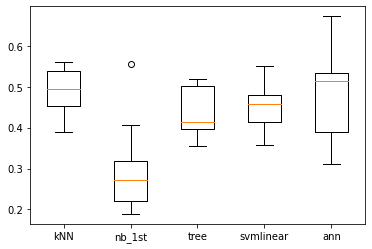

In [51]:
#
import matplotlib.pyplot as plt

plt.boxplot([ scores for alg, scores in result_df_superior.iteritems() ])
plt.xticks(1 + np.arange(result_df_superior.shape[1]), result_df_superior.columns)
plt.show()

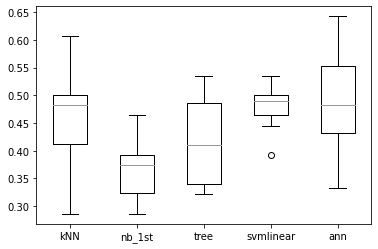

In [ ]:
#
plt.boxplot([ scores for alg, scores in result_df_media.iteritems() ])
plt.xticks(1 + np.arange(result_df_media.shape[1]), result_df_media.columns)
plt.show()

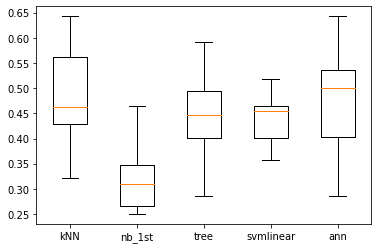

In [ ]:
#
plt.boxplot([ scores for alg, scores in result_df_inferior.iteritems() ])
plt.xticks(1 + np.arange(result_df_inferior.shape[1]), result_df_inferior.columns)
plt.show()

In [13]:
from sklearn.model_selection import cross_val_score

scorer = make_scorer(f1_score, average='micro') # Teste outras

result_superior = {}
for alg, clf in algorithms.items():
    result_superior[alg] = cross_val_score(clf, X, y['dados.Costa_superior'], cv=cv)

result_df_superior = pd.DataFrame.from_dict(result_superior)

result_media = {}
for alg, clf in algorithms.items():
    result_media[alg] = cross_val_score(clf, X, y['dados.Costa_media'], cv=cv)

result_df_media = pd.DataFrame.from_dict(result_media)

result_inferior = {}
for alg, clf in algorithms.items():
    result_inferior[alg] = cross_val_score(clf, X, y['dados.Costa_inferior'], cv=cv)

result_df_inferior = pd.DataFrame.from_dict(result_inferior)

In [14]:
#f1 score
result_df_superior

,kNN,nb_1st,tree,svmlinear,ann
0,0.450000,0.375000,0.325000,0.450000,0.400000
1,0.450000,0.200000,0.350000,0.525000,0.550000
2,0.550000,0.225000,0.375000,0.500000,0.550000
3,0.425000,0.225000,0.550000,0.600000,0.325000
4,0.600000,0.550000,0.625000,0.525000,0.675000
5,0.475000,0.350000,0.400000,0.450000,0.375000
6,0.600000,0.300000,0.525000,0.525000,0.550000
7,0.425000,0.325000,0.550000,0.400000,0.525000
8,0.538462,0.256410,0.564103,0.512821,0.384615
9,0.487179,0.307692,0.487179,0.487179,0.538462


In [ ]:
#f1 score
result_df_media

In [ ]:
#f1 score
result_df_inferior